<a href="https://colab.research.google.com/github/coen2812023/Clustering/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


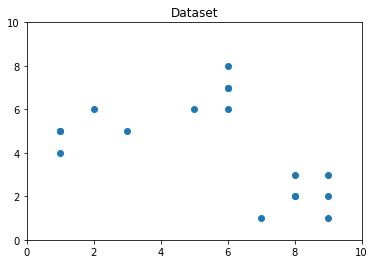

In [2]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


##Distortion: 
It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
##Inertia: 
It is the sum of squared distances of samples to their closest cluster center.


---



We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [4]:
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6635212812400347
6 : 0.5920126825722446
7 : 0.5274410771884641
8 : 0.42618267462691206
9 : 0.3333333333333333


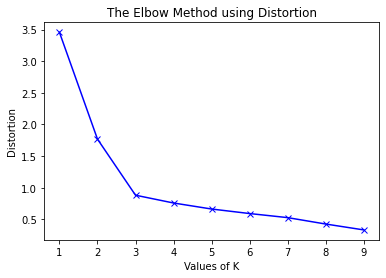

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


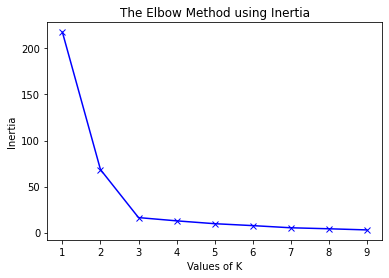

In [7]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [6]:
for key, val in mapping2.items():
	print(f'{key} : {val}')


1 : 217.64705882352942
2 : 68.42857142857142
3 : 16.22857142857143
4 : 12.695238095238098
5 : 9.600000000000001
6 : 7.5166666666666675
7 : 5.166666666666666
8 : 4.083333333333333
9 : 2.8333333333333335


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
# enable interactive mode
plt.ion()

def kmeans(data, k, max_iterations=100):
    """
    Implementation of K-Means clustering algorithm.

    Parameters:
        data (numpy.ndarray): A 2D array of shape (n_samples, n_features).
        k (int): The number of clusters to form.
        max_iterations (int): The maximum number of iterations to run the algorithm.

    Returns:
        numpy.ndarray: A 1D array of shape (n_samples,) containing the cluster assignments.
    """
    # Initialize cluster centroids randomly
    centroids = data[np.random.choice(data.shape[0], size=k, replace=False)]
    
    # Iterate until convergence or maximum number of iterations is reached
    for i in range(max_iterations):
        # Compute Euclidean distance between each data point and the centroids
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)
        
        # Update centroids by taking the mean of the data points in each cluster
        for j in range(k):
            centroids[j] = np.mean(data[labels == j], axis=0)
        
        # Plot the data points and centroids for this iteration
        plt.scatter(data[:, 0], data[:, 1], c=labels)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
        plt.title(f"Iteration {i+1}")
        plt.pause(0.05)
        plt.show()
    
    return labels


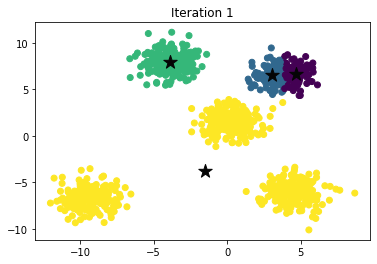

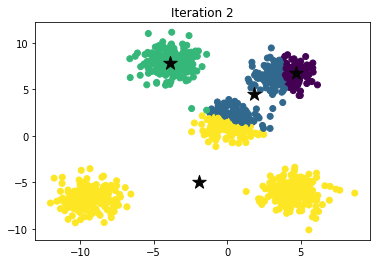

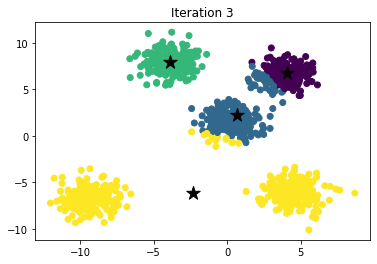

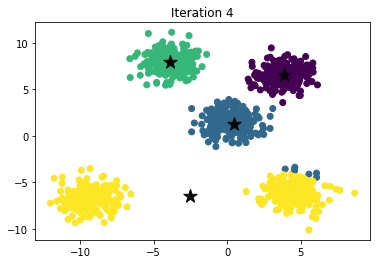

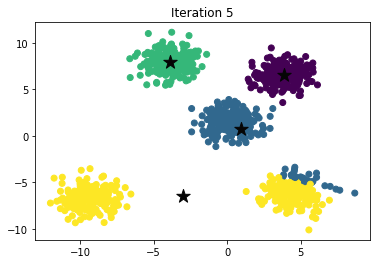

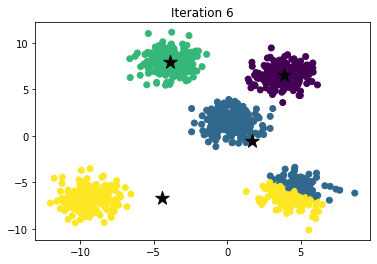

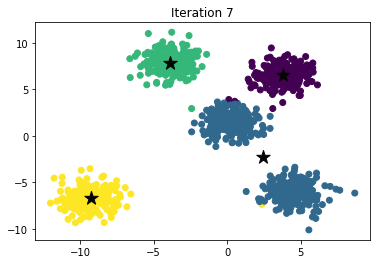

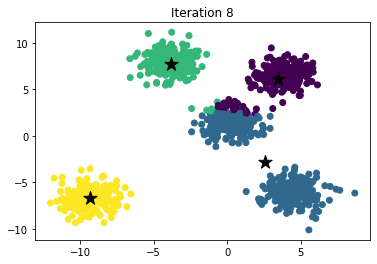

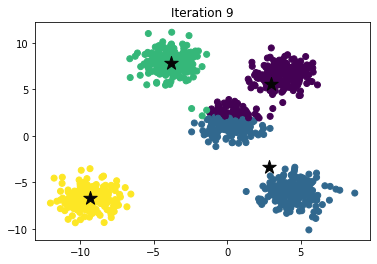

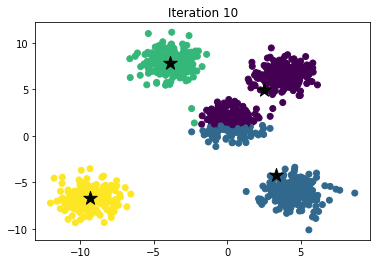

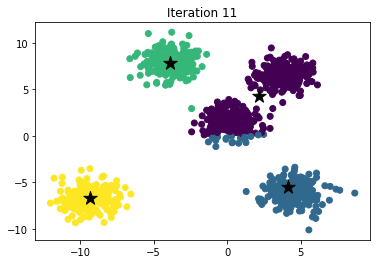

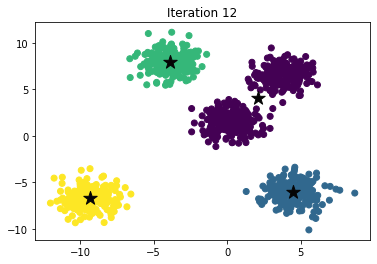

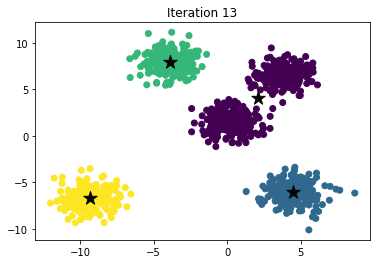

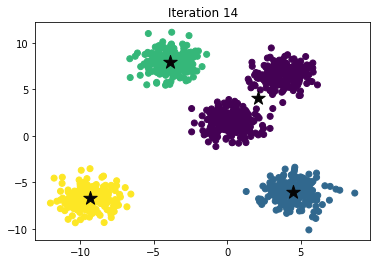

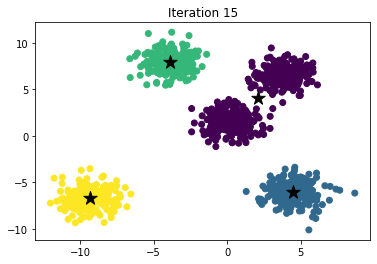

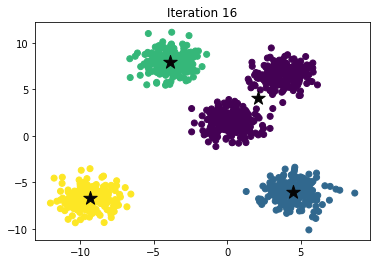

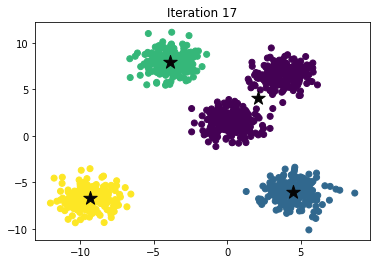

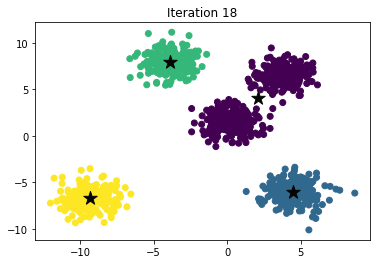

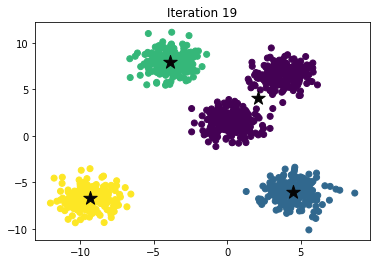

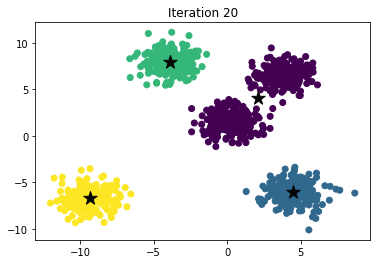

In [ ]:
# Generate random data
from sklearn.datasets import make_blobs
X_actual, y = make_blobs(n_samples=1000, centers=5, random_state=101)
np.random.seed(42)
data = X_actual

# Run K-Means clustering
labels = kmeans(data, k=4, max_iterations=20)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# enable interactive mode
plt.ion()

def kmeans(data, k, max_iterations=100):
    """
    Implementation of K-Means clustering algorithm.

    Parameters:
        data (numpy.ndarray): A 2D array of shape (n_samples, n_features).
        k (int): The number of clusters to form.
        max_iterations (int): The maximum number of iterations to run the algorithm.

    Returns:
        numpy.ndarray: A 1D array of shape (n_samples,) containing the cluster assignments.
    """
    # Initialize cluster centroids randomly
    centroids = data[np.random.choice(data.shape[0], size=k, replace=False)]
    
    # Create a figure object and subplots for plotting
    fig, ax = plt.subplots()
    
    
    # Iterate until convergence or maximum number of iterations is reached
    for i in range(max_iterations):
        # Compute Euclidean distance between each data point and the centroids
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)
        
        # Update centroids by taking the mean of the data points in each cluster
        for j in range(k):
            centroids[j] = np.mean(data[labels == j], axis=0)
        
        # Clear previous plot and plot the updated data points and centroids for this iteration
        # re-drawing the figure
       
        # to flush the GUI events
       
        ax.clear()
        ax.scatter(data[:, 0], data[:, 1], c=labels)
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
        ax.set_title(f"Iteration {i+1}")
        fig.canvas.draw()
        
        fig.canvas.flush_events()
        time.sleep(0.5)
        #plt.pause(0.5) # Pause for 0.5 seconds to show the plot
        
    return labels


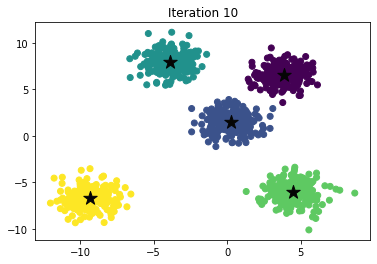

In [ ]:
# Generate random data
np.random.seed(42)

# Run K-Means clustering
labels = kmeans(data, k=5, max_iterations=10)


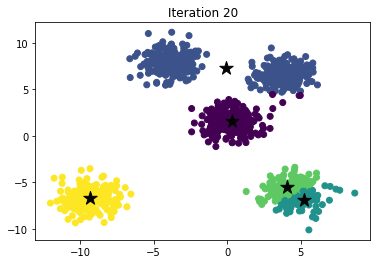

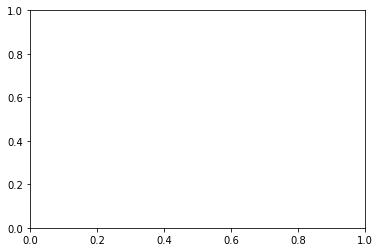

In [ ]:
from IPython import display
max_iterations= 20
k=5
centroids = data[np.random.choice(data.shape[0], size=k, replace=False)]
    
    # Create a figure object and subplots for plotting
fig, ax = plt.subplots()


# Iterate until convergence or maximum number of iterations is reached
for i in range(max_iterations):
    # Compute Euclidean distance between each data point and the centroids
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)
    
    # Update centroids by taking the mean of the data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[labels == j], axis=0)
    
    # Clear previous plot and plot the updated data points and centroids for this iteration
    # re-drawing the figure
    
    # to flush the GUI events
    # fig.canvas.draw()
    # ax.clear()
    display.clear_output(wait =True)
    ax.scatter(data[:, 0], data[:, 1], c=labels)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    ax.set_title(f"Iteration {i+1}")
    display.display(plt.gcf())
    time.sleep(0.5)
    
    plt.cla()
    #display.clear_output(wait =True)
    
    # fig.canvas.flush_events()
    # time.sleep(0.5)
